In [ ]:
#IMPORTO LIBRERIA A UTILIZAR
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from numpy import nan
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer

In [ ]:
url = 'https://raw.githubusercontent.com/ojmoreno1/ProyectoDS_Parte1_Omoreno/main/30_yr_stock_market_data.csv'
df_market30years = pd.read_csv(url, sep = ",")
#df = pd.read_csv(url, index_col=0)

In [ ]:
#LECTURA DE ARCHIVOS DE GOOGLE COLAB
#from google.colab import drive
#import os
#drive.mount('/content/drive')
#%cd '/content/drive/Mydrive'

Mounted at /content/drive


"""
---------------------------------------------------------------------------
DATASET DE DISTINTOS MERCADOS FINANCIEROS Y COMMODITIES DE LOS ULTIMOS 30 AÑOS
---------------------------------------------------------------------------
Dentro de dicho dataset encontramos los valores diarios de distintos mercados y commodities desde 1993 hasta noviembre de 2023
Cada columna representa un mercado o commodities por ejemplo:
DOW JONES es el mercado que nuclea a 30 empresas industriales de estados unidos
Nasdaq es el mercado que nuclea a las empresas de tecnologia tales como GOOGLE, CISCO, INTEL, ETC.
Tambien nos encontramos con commodities que hace referencia a materia primas tales como el cobre, petroleo, paladio,etc.
Y a su vez con encontramos con instrumentos de renta fija tales como los bonos a 10 años de EEUU, referencias para el mundo.

Aqui se pretende analizar las expansiones y contracciones de los mercados a lo largo del tiempo, identificar rescesiones y establecer una posible
tendencia futura de hacia donde pueden llegar a ir dichos mercados en los proximos años ubicando posibilidades de inversion.

"""

In [ ]:
# Especificamos la ruta al archivo
#ruta_csv_market = '/content/drive/MyDrive/Omoreno_DataScience/Entrega_1/30years_Stock_Dataset/30_yr_stock_market_data.csv'


# Leemos el archivo CSV en un DataFrame de pandas
#df_market30years = pd.read_csv(ruta_csv_market, sep = ",")

# Mostramos las primeras filas del DataFrame
print(df_market30years.head())


         Date  Dow Jones (^DJI)  Nasdaq (^IXIC)  S&P500 (^GSPC)  \
0  1993-11-29       3677.800049      751.539978      461.899994   
1  1993-11-30       3683.949951      754.390015      461.790009   
2  1993-12-01       3697.080078      763.809998      461.890015   
3  1993-12-02       3702.110107      766.729980      463.109985   
4  1993-12-03       3704.070068      772.219971      464.890015   

   NYSE Composite (^NYA)  Russell 2000 (^RUT)  CBOE Volitility (^VIX)  \
0            2697.040039           250.139999                   14.12   
1            2694.080078           250.410004                   13.76   
2            2699.159912           252.610001                   13.83   
3            2705.179932           252.910004                   13.51   
4            2714.699951           253.860001                   12.69   

   DAX Index (^GDAXI)  FTSE 100 (^FTSE)  Hang Seng Index (^HSI)  ...  \
0         2052.090088       3135.800049             9012.799805  ...   
1         2052

In [ ]:
#CONOCEMOS UN POCO EL DATA FRAME A TRAVES DE LA ESTADISTICA CON EL METODO DESCRIBE
df_market30years.describe()

Dow Jones (^DJI)  Nasdaq (^IXIC)  S&P500 (^GSPC)  \
count       7555.000000     7555.000000     7555.000000   
mean       14874.059387     4223.712258     1731.212676   
std         8510.822131     3691.005799     1054.231841   
min         3593.350098      693.789978      438.920013   
25%         9461.330078     1859.650024     1081.415039   
50%        11336.320312     2561.600098     1331.290039   
75%        18082.794922     5098.110107     2111.724976   
max        36799.648438    16057.440430     4796.560059   

       NYSE Composite (^NYA)  Russell 2000 (^RUT)  CBOE Volitility (^VIX)  \
count            7555.000000          7555.000000             7555.000000   
mean             8579.929613           886.886216               19.870349   
std              3625.209982           535.402652                8.177532   
min              2570.899902           235.160004                9.140000   
25%              6103.635010           461.294998               13.940000   
50%              7831.979980           711.919983               18.150000   
75%             10914.669922          1228.904968               23.425000   
max             17353.759766          2442.739990               82.690002   

       DAX Index (^GDAXI)  FTSE 100 (^FTSE)  Hang Seng Index (^HSI)  \
count         7604.000000       7578.000000             7402.000000   
mean          7525.672133       5747.179817            18321.661946   
std           3928.859211       1260.307172             6319.816948   
min           1911.699951       2876.600098             6660.419922   
25%           4492.372559       4896.325195            12545.547363   
50%           6512.445068       5924.350098            19110.515625   
75%          10735.822266       6707.199951            23256.157227   
max          16469.750000       8014.299805            33154.121094   

       Cocoa (CC=F)  ...  Crude Oil-WTI (CL=F)  Copper (HG=F)  Gold (GC=F)  \
count   5995.000000  ...           5842.000000    5837.000000  5833.000000   
mean    2248.069558  ...             64.154555       2.694865  1104.802451   
std      685.170089  ...             25.507924       1.100186   528.688117   
min      674.000000  ...            -37.630001       0.604000   255.100006   
25%     1697.000000  ...             44.750000       2.051500   612.400024   
50%     2341.000000  ...             62.004999       2.920500  1219.900024   
75%     2769.000000  ...             83.805000       3.496000  1519.599976   
max     4370.000000  ...            145.289993       4.929000  2067.899902   

       Palladium (PA=F)  Platinum (PL=F)  Silver (SI=F)  \
count       5542.000000      5302.000000    5835.000000   
mean         856.593297      1060.525895      16.535987   
std          645.733873       365.485434       8.322794   
min          148.500000       412.000000       4.026000   
25%          355.799988       847.799988      10.784000   
50%          699.875000       967.800018      16.488001   
75%         1005.087509      1345.200043      21.537000   
max         2985.399902      2251.100098      48.584000   

       Treasury Yield 5 Years (^FVX)  Treasury Bill 13 Week (^IRX)  \
count                    7535.000000                   7535.000000   
mean                        3.331369                      2.288631   
std                         1.927788                      2.095914   
min                         0.195000                     -0.105000   
25%                         1.646000                      0.130000   
50%                         3.023000                      1.682000   
75%                         4.818000                      4.650000   
max                         7.896000                      6.220000   

       Treasury Yield 10 Years (^TNX)  Treasury Yield 30 Years (^TYX)  
count                     7535.000000                     7535.000000  
mean                         3.833694                        4.370494  
std                          1.713725                      

In [ ]:
#Encontramos cuantos valores no definidos tipos NAN hay en el dataset
print(df_market30years.isnull().sum())
# Aqui encontramos que  que tenemos muchos valores no definidos en este dataset
# A su vez, observamos que no solo hay indices de mercado sino ademas commodities y
# bonos lo que dificulta entender o realizar un analisis, por lo que deberiamos
# sectorizar los mismos.

Date                                 0
Dow Jones (^DJI)                   199
Nasdaq (^IXIC)                     199
S&P500 (^GSPC)                     199
NYSE Composite (^NYA)              199
Russell 2000 (^RUT)                199
CBOE Volitility (^VIX)             199
DAX Index (^GDAXI)                 150
FTSE 100 (^FTSE)                   176
Hang Seng Index (^HSI)             352
Cocoa (CC=F)                      1759
Coffee (KC=F)                     1762
Corn (ZC=F)                       1908
Cotton (CT=F)                     1760
Live Cattle (LE=F)                2306
Orange Juice (OJ=F)               7192
Soybeans (ZS=F)                   1916
Sugar (SB=F)                      1799
Wheat (ZW=F)                      1920
Ethanol (EH=F)                    3077
Heating Oil (HO=F)                1919
Natural Gas (NG=F)                1916
Crude Oil-Brent (BZ=F)            3700
Crude Oil-WTI (CL=F)              1912
Copper (HG=F)                     1917
Gold (GC=F)              

In [ ]:
# Salvo la primer fila del data_set donde estan los encabezados
first_row = df_market30years.columns.values
print(first_row)

['Date' 'Dow Jones (^DJI)' 'Nasdaq (^IXIC)' 'S&P500 (^GSPC)'
 'NYSE Composite (^NYA)' 'Russell 2000 (^RUT)' 'CBOE Volitility (^VIX)'
 'DAX Index (^GDAXI)' 'FTSE 100 (^FTSE)' 'Hang Seng Index (^HSI)'
 'Cocoa (CC=F)' 'Coffee (KC=F)' 'Corn (ZC=F)' 'Cotton (CT=F)'
 'Live Cattle (LE=F)' 'Orange Juice (OJ=F)' 'Soybeans (ZS=F)'
 'Sugar (SB=F)' 'Wheat (ZW=F)' 'Ethanol (EH=F)' 'Heating Oil (HO=F)'
 'Natural Gas (NG=F)' 'Crude Oil-Brent (BZ=F)' 'Crude Oil-WTI (CL=F)'
 'Copper (HG=F)' 'Gold (GC=F)' 'Palladium (PA=F)' 'Platinum (PL=F)'
 'Silver (SI=F)' 'Treasury Yield 5 Years (^FVX)'
 'Treasury Bill 13 Week (^IRX)' 'Treasury Yield 10 Years (^TNX)'
 'Treasury Yield 30 Years (^TYX)']


In [ ]:
#Utilizo simple imputer para reemplazar los NAN por valor contante "0"
#---------------------------------------------------------------------
# Crear un numpy array con los valores
market_valores = df_market30years.values
# definir el imputador
imputador = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
# transformar el dataset
transformados = imputador.fit_transform(market_valores)
# Contar el numero de NaN en cada columna
#print('Missing: %d' % isnan(transformados).sum())
df_market30years_new=pd.DataFrame(transformados)

print(df_market30years_new.head().round(2))

           0            1           2           3            4           5   \
0  1993-11-29  3677.800049  751.539978  461.899994  2697.040039  250.139999   
1  1993-11-30  3683.949951  754.390015  461.790009  2694.080078  250.410004   
2  1993-12-01  3697.080078  763.809998  461.890015  2699.159912  252.610001   
3  1993-12-02  3702.110107   766.72998  463.109985  2705.179932  252.910004   
4  1993-12-03  3704.070068  772.219971  464.890015  2714.699951  253.860001   

      6            7            8            9   ... 23 24 25 26 27 28     29  \
0  14.12  2052.090088  3135.800049  9012.799805  ...  0  0  0  0  0  0  5.075   
1  13.76  2052.919922  3166.899902  9125.200195  ...  0  0  0  0  0  0  5.146   
2  13.83   2089.77002  3233.199951       9254.0  ...  0  0  0  0  0  0  5.132   
3  13.51   2099.76001  3223.899902  9238.200195  ...  0  0  0  0  0  0  5.146   
4  12.69  2128.300049  3234.199951  9294.400391  ...  0  0  0  0  0  0  5.175   

     30     31     32  
0  3.11  5.732

In [ ]:
# Como la funcion simple imputer modifico los string de encabezado del data_set
# debo copiar nuevamente el la cadena de la primer fila
df_market30years_new= df_market30years_new.set_axis(first_row,axis=1)
df_market30years_new.head()

Date Dow Jones (^DJI) Nasdaq (^IXIC) S&P500 (^GSPC)  \
0  1993-11-29      3677.800049     751.539978     461.899994   
1  1993-11-30      3683.949951     754.390015     461.790009   
2  1993-12-01      3697.080078     763.809998     461.890015   
3  1993-12-02      3702.110107      766.72998     463.109985   
4  1993-12-03      3704.070068     772.219971     464.890015   

  NYSE Composite (^NYA) Russell 2000 (^RUT) CBOE Volitility (^VIX)  \
0           2697.040039          250.139999                  14.12   
1           2694.080078          250.410004                  13.76   
2           2699.159912          252.610001                  13.83   
3           2705.179932          252.910004                  13.51   
4           2714.699951          253.860001                  12.69   

  DAX Index (^GDAXI) FTSE 100 (^FTSE) Hang Seng Index (^HSI)  ...  \
0        2052.090088      3135.800049            9012.799805  ...   
1        2052.919922      3166.899902            9125.200195  ...   
2         2089.77002      3233.199951                 9254.0  ...   
3         2099.76001      3223.899902            9238.200195  ...   
4        2128.300049      3234.199951            9294.400391  ...   

  Crude Oil-WTI (CL=F) Copper (HG=F) Gold (GC=F) Palladium (PA=F)  \
0                    0             0           0                0   
1                    0             0           0                0   
2                    0             0           0                0   
3                    0             0           0                0   
4                    0             0           0                0   

  Platinum (PL=F) Silver (SI=F) Treasury Yield 5 Years (^FVX)  \
0               0             0                         5.075   
1               0             0                         5.146   
2               0             0                         5.132   
3               0             0                         5.146   
4               0             0                         5.175   

  Treasury Bill 13 Week (^IRX) Treasury Yield 10 Years (^TNX)  \
0                         3.11                          5.732   
1                         3.14                          5.795   
2                         3.11                          5.783   
3                         3.11                          5.778   
4                         3.11                          5.783   

  Treasury Yield 30 Years (^TYX)  
0                          6.226  
1                          6.286  
2                          6.268  
3                          6.263  
4                          6.258  

[5 rows x 33 columns]

#*ANALISIS_PRELIMINAR*:
Necesitamos separar el data_set en conjunto de datos relativos a cada sector para poder realizar analisis individual y entender cada sector de mercado.Luego de ello podremos buscar correlaciones entre algunos indicadores que nos permitan armar una cartera basada en los distintos ETFs.
Separaremos el data_set de indicadores en los siguientes:


*   MARKET_INDEX = MRKI
*   AGRICULTURE_COMMODITY = AGCI
*   ENERGY_COMMODITY= ENCI
*   METAL_COMMODITY = MTCI
*   BONES = BNS

In [ ]:
# MARKET_INDEX = MRKI
df_mrki = df_market30years_new.iloc[:,0:10]
df_mrki.head()


Date Dow Jones (^DJI) Nasdaq (^IXIC) S&P500 (^GSPC)  \
0  1993-11-29      3677.800049     751.539978     461.899994   
1  1993-11-30      3683.949951     754.390015     461.790009   
2  1993-12-01      3697.080078     763.809998     461.890015   
3  1993-12-02      3702.110107      766.72998     463.109985   
4  1993-12-03      3704.070068     772.219971     464.890015   

  NYSE Composite (^NYA) Russell 2000 (^RUT) CBOE Volitility (^VIX)  \
0           2697.040039          250.139999                  14.12   
1           2694.080078          250.410004                  13.76   
2           2699.159912          252.610001                  13.83   
3           2705.179932          252.910004                  13.51   
4           2714.699951          253.860001                  12.69   

  DAX Index (^GDAXI) FTSE 100 (^FTSE) Hang Seng Index (^HSI)  
0        2052.090088      3135.800049            9012.799805  
1        2052.919922      3166.899902            9125.200195  
2         2089.77002      3233.199951                 9254.0  
3         2099.76001      3223.899902            9238.200195  
4        2128.300049      3234.199951            9294.400391

In [ ]:
# AGRICULTURE_COMMODITY = AGCI
df_agci = df_market30years_new.iloc[:,10:19]
df_agci.insert(0, 'Date', df_market30years_new.iloc[:,0])
df_agci.head()

Date Cocoa (CC=F) Coffee (KC=F) Corn (ZC=F) Cotton (CT=F)  \
0  1993-11-29            0             0           0             0   
1  1993-11-30            0             0           0             0   
2  1993-12-01            0             0           0             0   
3  1993-12-02            0             0           0             0   
4  1993-12-03            0             0           0             0   

  Live Cattle (LE=F) Orange Juice (OJ=F) Soybeans (ZS=F) Sugar (SB=F)  \
0                  0                   0               0            0   
1                  0                   0               0            0   
2                  0                   0               0            0   
3                  0                   0               0            0   
4                  0                   0               0            0   

  Wheat (ZW=F)  
0            0  
1            0  
2            0  
3            0  
4            0

In [ ]:
# ENERGY_COMMODITY = ENCI
df_enci = df_market30years_new.iloc[:,19:24]
df_enci.insert(0, 'Date', df_market30years_new.iloc[:,0])
df_enci.head()

Date Ethanol (EH=F) Heating Oil (HO=F) Natural Gas (NG=F)  \
0  1993-11-29              0                  0                  0   
1  1993-11-30              0                  0                  0   
2  1993-12-01              0                  0                  0   
3  1993-12-02              0                  0                  0   
4  1993-12-03              0                  0                  0   

  Crude Oil-Brent (BZ=F) Crude Oil-WTI (CL=F)  
0                      0                    0  
1                      0                    0  
2                      0                    0  
3                      0                    0  
4                      0                    0

In [ ]:
# METAL_COMMODITY = MTCI
df_mtci = df_market30years_new.iloc[:,24:29]
df_mtci.insert(0, 'Date', df_market30years_new.iloc[:,0])
df_mtci.head()

Date Copper (HG=F) Gold (GC=F) Palladium (PA=F) Platinum (PL=F)  \
0  1993-11-29             0           0                0               0   
1  1993-11-30             0           0                0               0   
2  1993-12-01             0           0                0               0   
3  1993-12-02             0           0                0               0   
4  1993-12-03             0           0                0               0   

  Silver (SI=F)  
0             0  
1             0  
2             0  
3             0  
4             0

In [ ]:
# BONES = BNS
df_bns = df_market30years_new.iloc[:,29:33]
df_bns.insert(0, 'Date', df_market30years_new.iloc[:,0])
df_bns.head()



Date Treasury Yield 5 Years (^FVX) Treasury Bill 13 Week (^IRX)  \
0  1993-11-29                         5.075                         3.11   
1  1993-11-30                         5.146                         3.14   
2  1993-12-01                         5.132                         3.11   
3  1993-12-02                         5.146                         3.11   
4  1993-12-03                         5.175                         3.11   

  Treasury Yield 10 Years (^TNX) Treasury Yield 30 Years (^TYX)  
0                          5.732                          6.226  
1                          5.795                          6.286  
2                          5.783                          6.268  
3                          5.778                          6.263  
4                          5.783                          6.258

In [ ]:
#TRATAMOS SERIE DE TIEMPOS
fechas = df_market30years['Date']
anio = fechas.str.split('-').str[0]
mes = fechas.str.split('-').str[1]
dia = fechas.str.split('-').str[2]
# MARKET_INDEX
df_mrki.insert(1, 'Año', anio)
df_mrki.insert(2, 'Mes', mes)
df_mrki.insert(3, 'Dia', dia)
# AGRICULTURE INDEX
df_agci.insert(1, 'Año', anio)
df_agci.insert(2, 'Mes', mes)
df_agci.insert(3, 'Dia', dia)
# ENERGY INDEX
df_enci.insert(1, 'Año', anio)
df_enci.insert(2, 'Mes', mes)
df_enci.insert(3, 'Dia', dia)
# METAL INDEX
df_mtci.insert(1, 'Año', anio)
df_mtci.insert(2, 'Mes', mes)
df_mtci.insert(3, 'Dia', dia)
# BONES
df_bns.insert(1, 'Año', anio)
df_bns.insert(2, 'Mes', mes)
df_bns.insert(3, 'Dia', dia)


In [ ]:
# Los Valores en cero no son representativos ya que estos indices a nivel historico tienen un valor
# Aquellas celdas que sean = 0 las eliminamos del data set
df_mrki_1 = df_mrki[df_mrki != 0]
df_mrki_1.index = df_mrki_1['Date']
df_mrki_1 = df_mrki_1.drop(columns=['Date'])
df_mrki_1 = df_mrki_1.drop(columns=['Año'])
df_mrki_1 = df_mrki_1.drop(columns=['Mes'])
df_mrki_1 = df_mrki_1.drop(columns=['Dia'])
df_mrki_1.head()

Dow Jones (^DJI) Nasdaq (^IXIC) S&P500 (^GSPC)  \
Date                                                        
1993-11-29      3677.800049     751.539978     461.899994   
1993-11-30      3683.949951     754.390015     461.790009   
1993-12-01      3697.080078     763.809998     461.890015   
1993-12-02      3702.110107      766.72998     463.109985   
1993-12-03      3704.070068     772.219971     464.890015   

           NYSE Composite (^NYA) Russell 2000 (^RUT) CBOE Volitility (^VIX)  \
Date                                                                          
1993-11-29           2697.040039          250.139999                  14.12   
1993-11-30           2694.080078          250.410004                  13.76   
1993-12-01           2699.159912          252.610001                  13.83   
1993-12-02           2705.179932          252.910004                  13.51   
1993-12-03           2714.699951          253.860001                  12.69   

           DAX Index (^GDAXI) FTSE 100 (^FTSE) Hang Seng Index (^HSI)  
Date                                                                   
1993-11-29        2052.090088      3135.800049            9012.799805  
1993-11-30        2052.919922      3166.899902            9125.200195  
1993-12-01         2089.77002      3233.199951                 9254.0  
1993-12-02         2099.76001      3223.899902            9238.200195  
1993-12-03        2128.300049      3234.199951            9294.400391

GRAFICAS PRELIMINARES DE INDICE DE DATOS (MRKI)

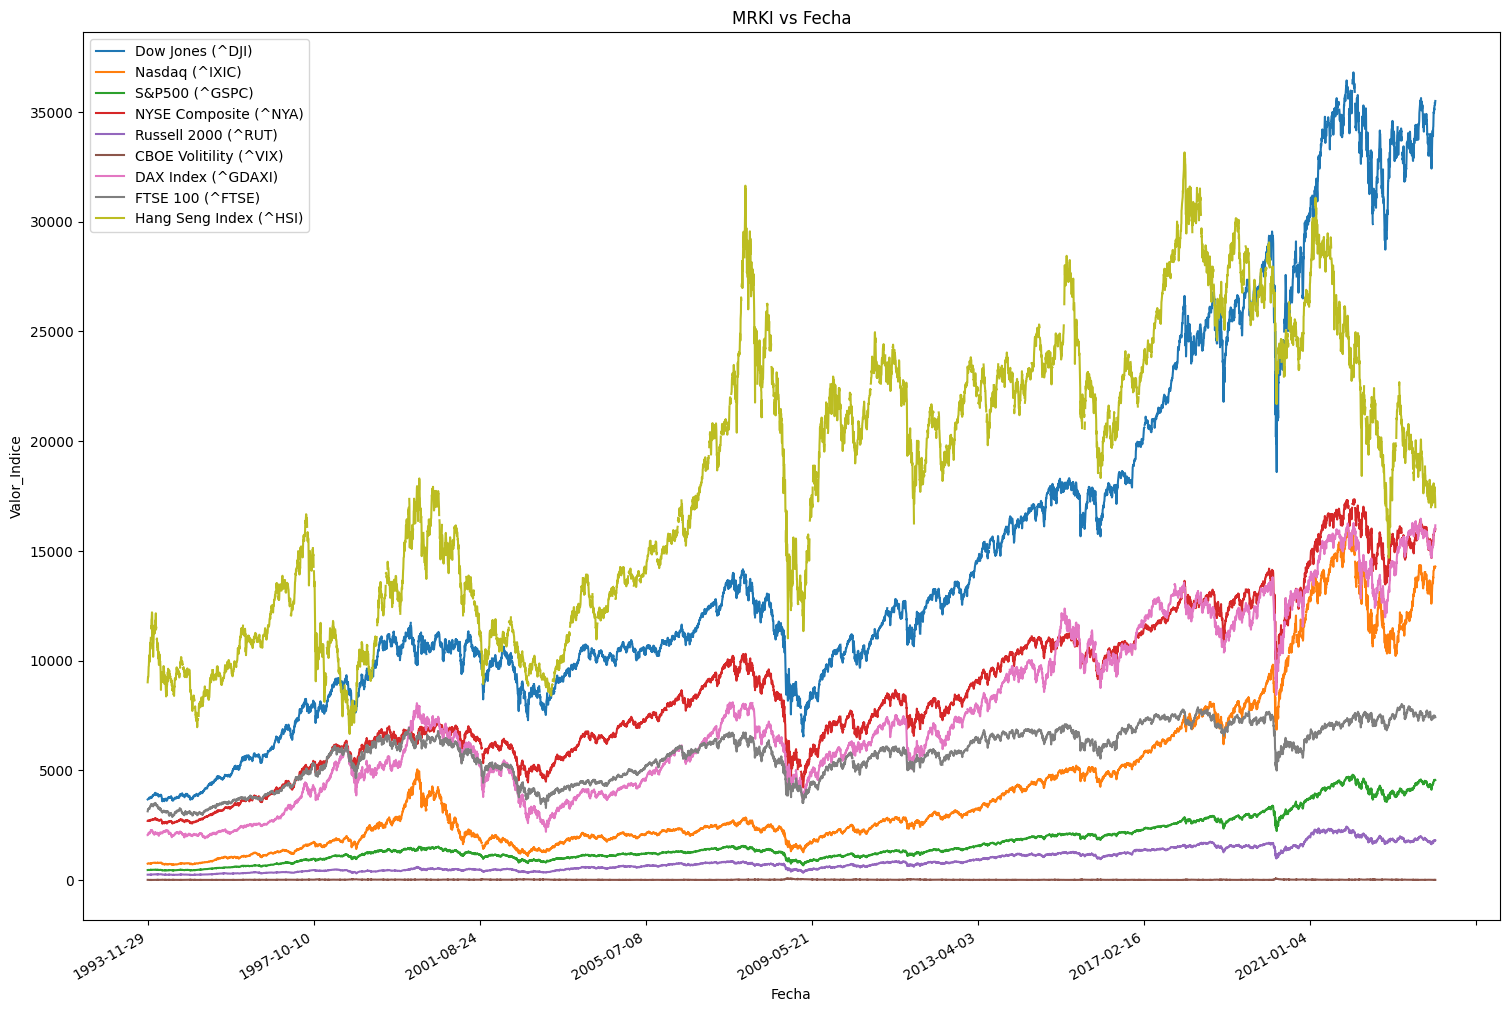

In [ ]:
# GRAFICO MRKI
fig, ax = plt.subplots(figsize=(15,10))
df_mrki_1.plot(ax = ax)
plt.gcf().autofmt_xdate() # Ajuste valores de fechas
plt.tight_layout() # Ajustar los ejes
ax.set_title('MRKI vs Fecha')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor_Indice')
plt.show()


# TASA DE DIFERENCIA
LOS CAMBIO ENTRE PERIODOS DEL DATASET PARA CADA COLUMNA

In [ ]:
# GRAFICO CAMBIO ENTRE PERIODOS
df_n=df_mrki_1.copy()
df_n['Date']=df_mrki_1.index
df_n= df_n.reset_index(drop=True)
df_long=pd.melt(df_n , value_vars=df_mrki_1.columns,id_vars='Date')


In [ ]:
import plotly.express as px


fig=px.line(data_frame=df_long,x='Date',y='value',line_group='variable',color='variable',title='Comportamiento de precio MRKI',\
             labels={
                     "Fecha": "FECHA_DIAS",
                     "value": "VALOR_INDICE"
                 })
fig.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF',)

fig.show()

En este apartado prodremos concluir que se evidencia una gran variacion y crecimiento de indice DOW POR SOBRE EL RESTO, lo siguen el NASDAQ,FTSE y el NYSE.Tambien encontramos una cambio en menor medida pero con una tasa de crecimiento tambien sostenido para el S&P500. Por ultimo observar una gran caida del HANG SENG a partir del año 2018 con algunos rebotes pero sin poder romper al alza potenciando su caida en el año 2021 coincidente con la pandemia.

# CORRELACIONES:
OBSERVANDO LAS GRAFICAS LINEALES PODEMOS VER QUE EXISTE CORRELACIONES ENTRE LOS DIFERENTES INDICES YA QUE REPRESENTAN CURVAS SIMILARES EN EL TIEMPO. AQUI PROBAMOS SI EXISTE ALGUNA CORRELACION ENTRE ELLOS Y CUAN ASI ES. UTILIZAMOS LA LIBRERIA SPICY Y EL METODO PERSON

In [ ]:

r, p = stats.pearsonr(df_mrki_1.iloc [1], df_mrki_1.iloc [2])
print(f"Correlación Pearson: r={r}, p-value={p}")


Correlación Pearson: r=0.9999783538616129, p-value=1.553672266791381e-16


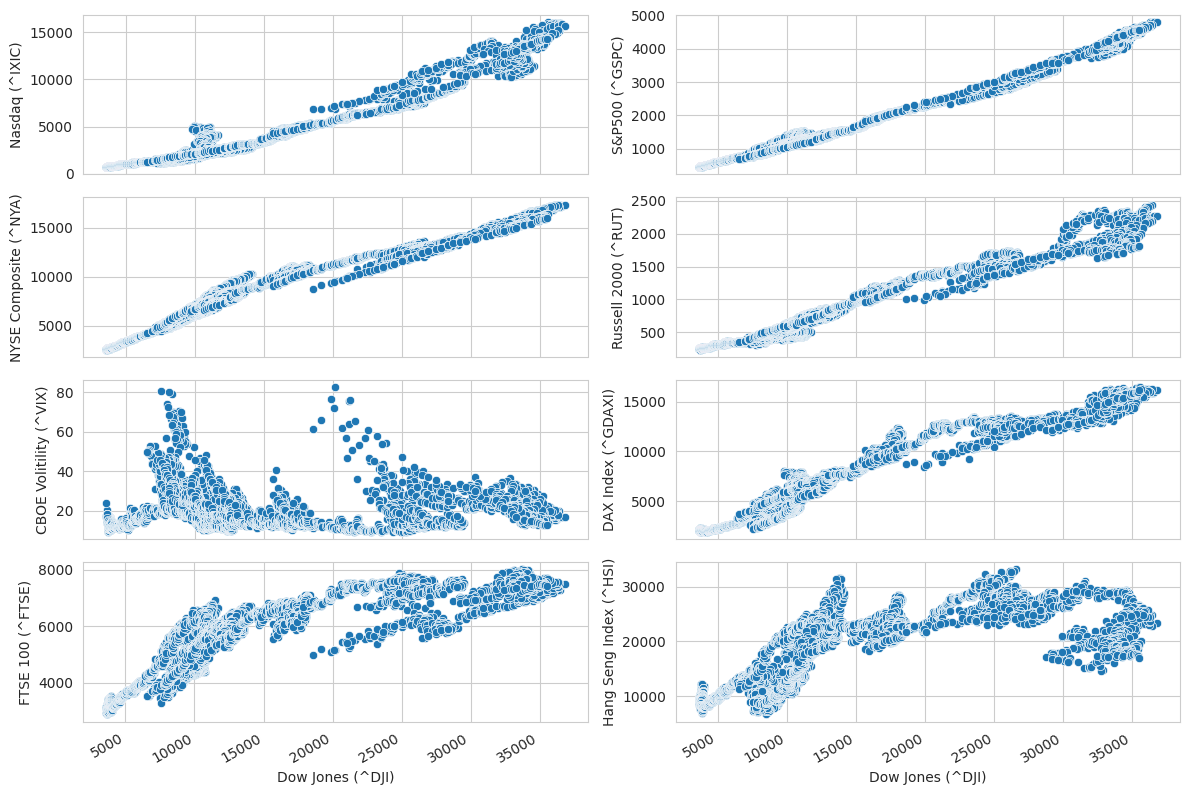

In [ ]:
"""
---------------------------------------------------
CORRELACION DOWJONES COMPOSITE CON OTROS INDICADORES
---------------------------------------------------
"""
sns.set_style('whitegrid')
fig, axes = plt.subplots(4, 2,figsize=(12,8))
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,0],y=df_mrki_1.iloc [:,1], ax=axes[0,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,0],y=df_mrki_1.iloc [:,2], ax=axes[0,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,0],y=df_mrki_1.iloc [:,3], ax=axes[1,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,0],y=df_mrki_1.iloc [:,4], ax=axes[1,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,0],y=df_mrki_1.iloc [:,5], ax=axes[2,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,0],y=df_mrki_1.iloc [:,6], ax=axes[2,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,0],y=df_mrki_1.iloc [:,7], ax=axes[3,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,0],y=df_mrki_1.iloc [:,8], ax=axes[3,1])
plt.gcf().autofmt_xdate() # Ajuste valores de fechas
plt.tight_layout() # Ajustar los ejes
plt.show()

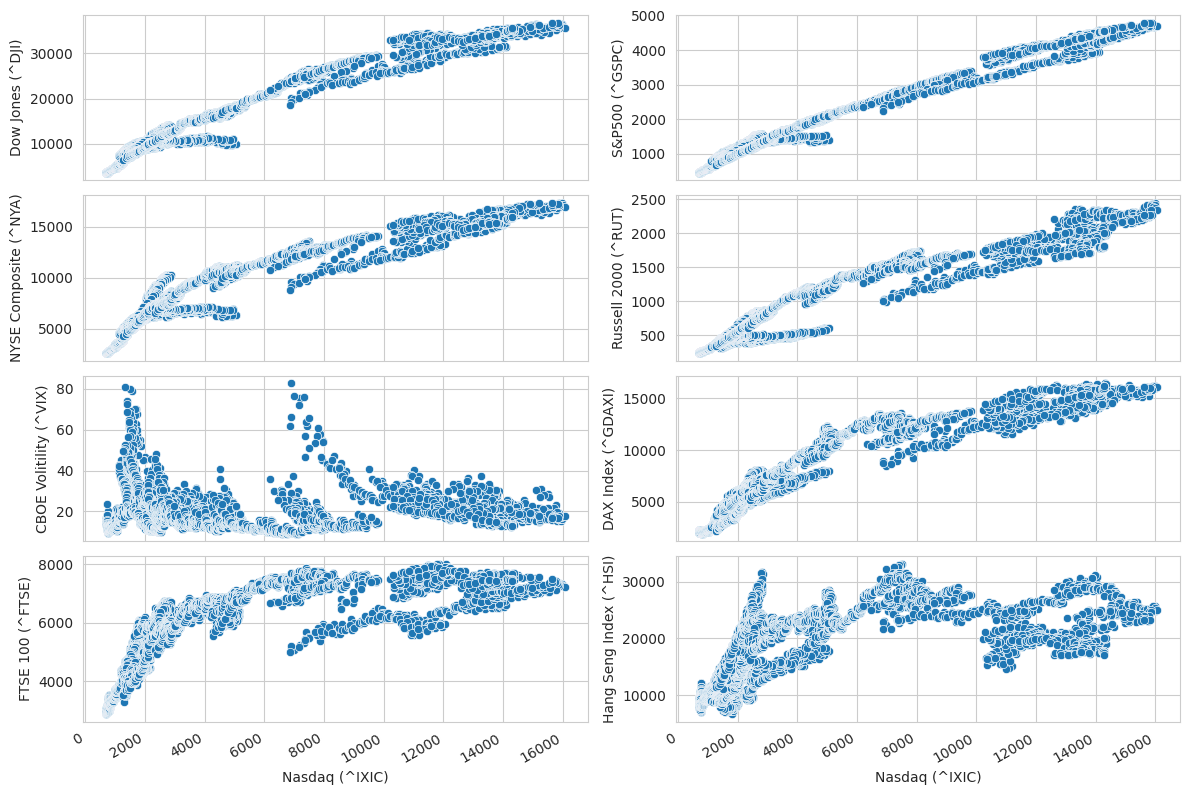

In [ ]:
"""
---------------------------------------------------
CORRELACION NASDAQ COMPOSITE CON OTROS INDICADORES
---------------------------------------------------
"""
sns.set_style('whitegrid')
fig, axes = plt.subplots(4,2,figsize=(12,8))
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,1],y=df_mrki_1.iloc [:,0], ax=axes[0,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,1],y=df_mrki_1.iloc [:,2], ax=axes[0,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,1],y=df_mrki_1.iloc [:,3], ax=axes[1,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,1],y=df_mrki_1.iloc [:,4], ax=axes[1,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,1],y=df_mrki_1.iloc [:,5], ax=axes[2,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,1],y=df_mrki_1.iloc [:,6], ax=axes[2,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,1],y=df_mrki_1.iloc [:,7], ax=axes[3,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,1],y=df_mrki_1.iloc [:,8], ax=axes[3,1])
plt.gcf().autofmt_xdate() # Ajuste valores de fechas
plt.tight_layout() # Ajustar los ejes
plt.show()

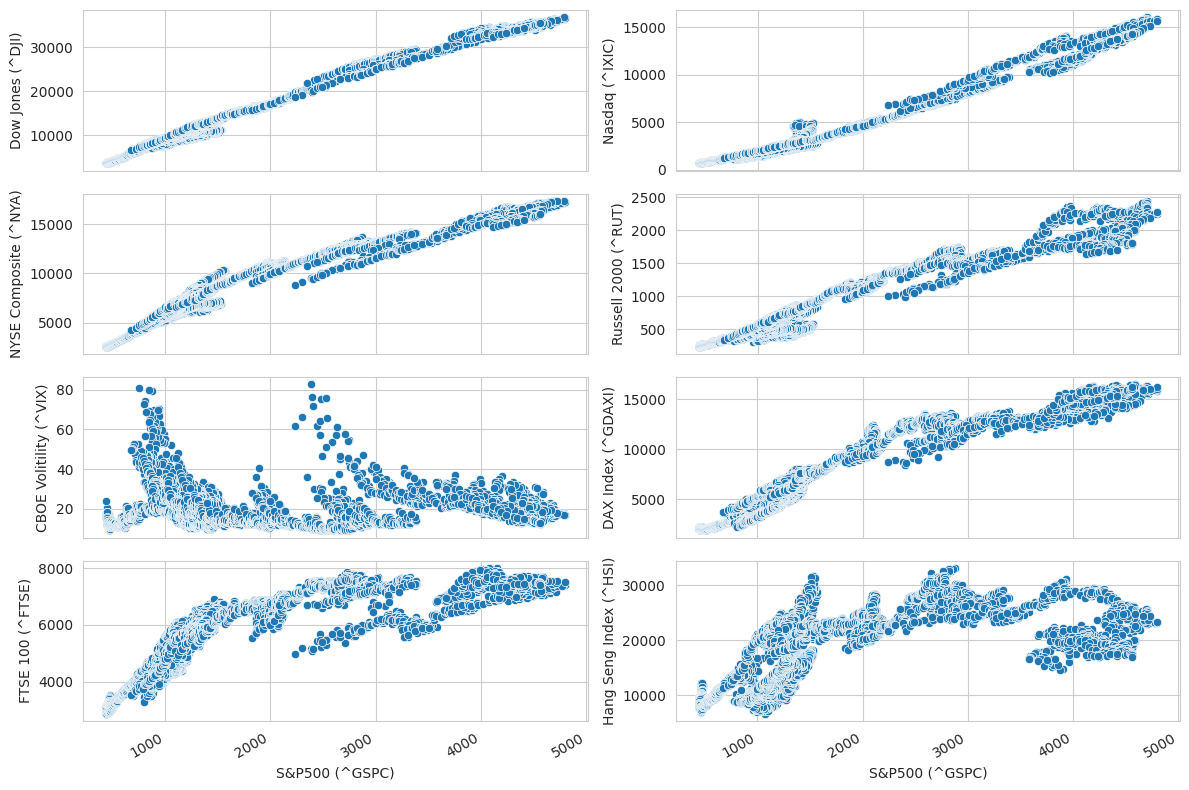

In [ ]:
"""
---------------------------------------------------
CORRELACION S&P500 COMPOSITE CON OTROS INDICADORES
---------------------------------------------------
"""
sns.set_style('whitegrid')
fig, axes = plt.subplots(4,2,figsize=(12,8))
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,2],y=df_mrki_1.iloc [:,0], ax=axes[0,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,2],y=df_mrki_1.iloc [:,1], ax=axes[0,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,2],y=df_mrki_1.iloc [:,3], ax=axes[1,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,2],y=df_mrki_1.iloc [:,4], ax=axes[1,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,2],y=df_mrki_1.iloc [:,5], ax=axes[2,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,2],y=df_mrki_1.iloc [:,6], ax=axes[2,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,2],y=df_mrki_1.iloc [:,7], ax=axes[3,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,2],y=df_mrki_1.iloc [:,8], ax=axes[3,1])
plt.gcf().autofmt_xdate() # Ajuste valores de fechas
plt.tight_layout() # Ajustar los ejes
plt.show()

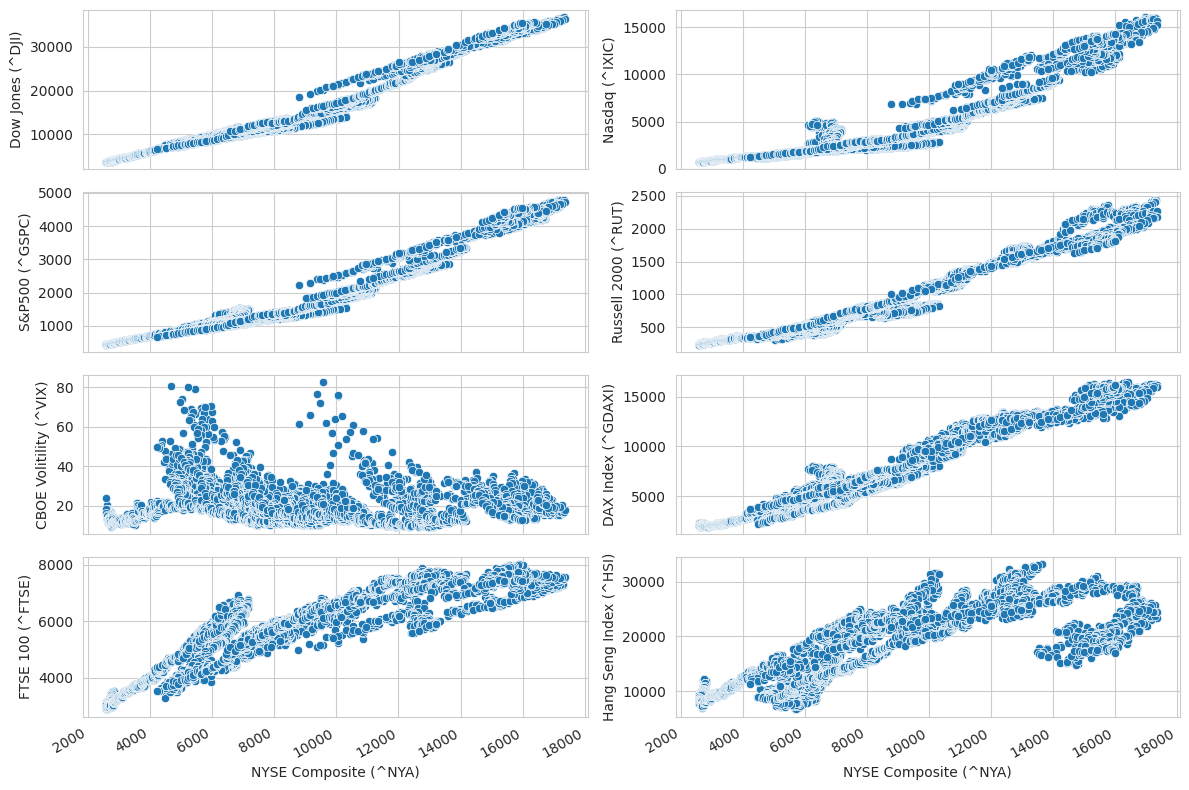

In [ ]:
"""
---------------------------------------------------
CORRELACION NYSE COMPOSITE CON OTROS INDICADORES
---------------------------------------------------
"""
sns.set_style('whitegrid')
fig, axes = plt.subplots(4,2,figsize=(12,8))
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,3],y=df_mrki_1.iloc [:,0], ax=axes[0,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,3],y=df_mrki_1.iloc [:,1], ax=axes[0,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,3],y=df_mrki_1.iloc [:,2], ax=axes[1,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,3],y=df_mrki_1.iloc [:,4], ax=axes[1,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,3],y=df_mrki_1.iloc [:,5], ax=axes[2,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,3],y=df_mrki_1.iloc [:,6], ax=axes[2,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,3],y=df_mrki_1.iloc [:,7], ax=axes[3,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,3],y=df_mrki_1.iloc [:,8], ax=axes[3,1])
plt.gcf().autofmt_xdate() # Ajuste valores de fechas
plt.tight_layout() # Ajustar los ejes
plt.show()

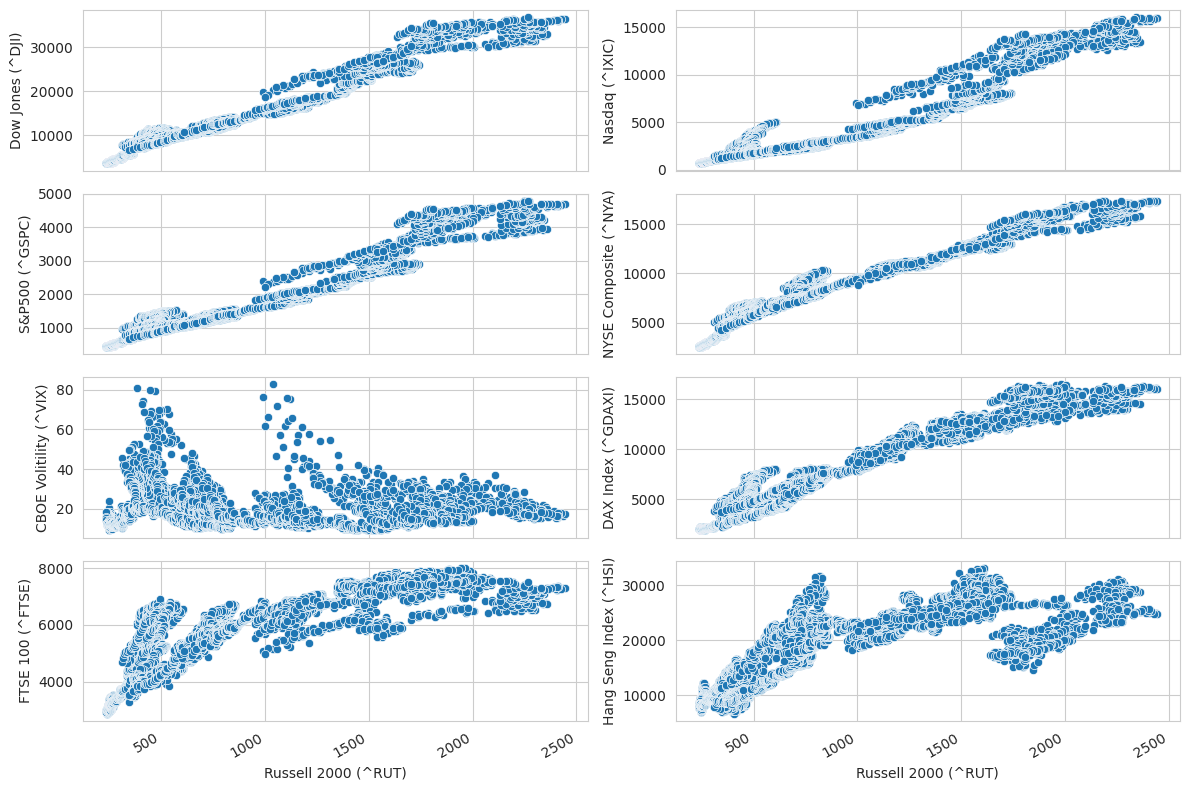

In [ ]:
"""
---------------------------------------------------
CORRELACION RUSSELL2000 COMPOSITE CON OTROS INDICADORES
---------------------------------------------------
"""
sns.set_style('whitegrid')
fig, axes = plt.subplots(4,2,figsize=(12,8))
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,4],y=df_mrki_1.iloc [:,0], ax=axes[0,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,4],y=df_mrki_1.iloc [:,1], ax=axes[0,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,4],y=df_mrki_1.iloc [:,2], ax=axes[1,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,4],y=df_mrki_1.iloc [:,3], ax=axes[1,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,4],y=df_mrki_1.iloc [:,5], ax=axes[2,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,4],y=df_mrki_1.iloc [:,6], ax=axes[2,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,4],y=df_mrki_1.iloc [:,7], ax=axes[3,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,4],y=df_mrki_1.iloc [:,8], ax=axes[3,1])
plt.gcf().autofmt_xdate() # Ajuste valores de fechas
plt.tight_layout() # Ajustar los ejes
plt.show()

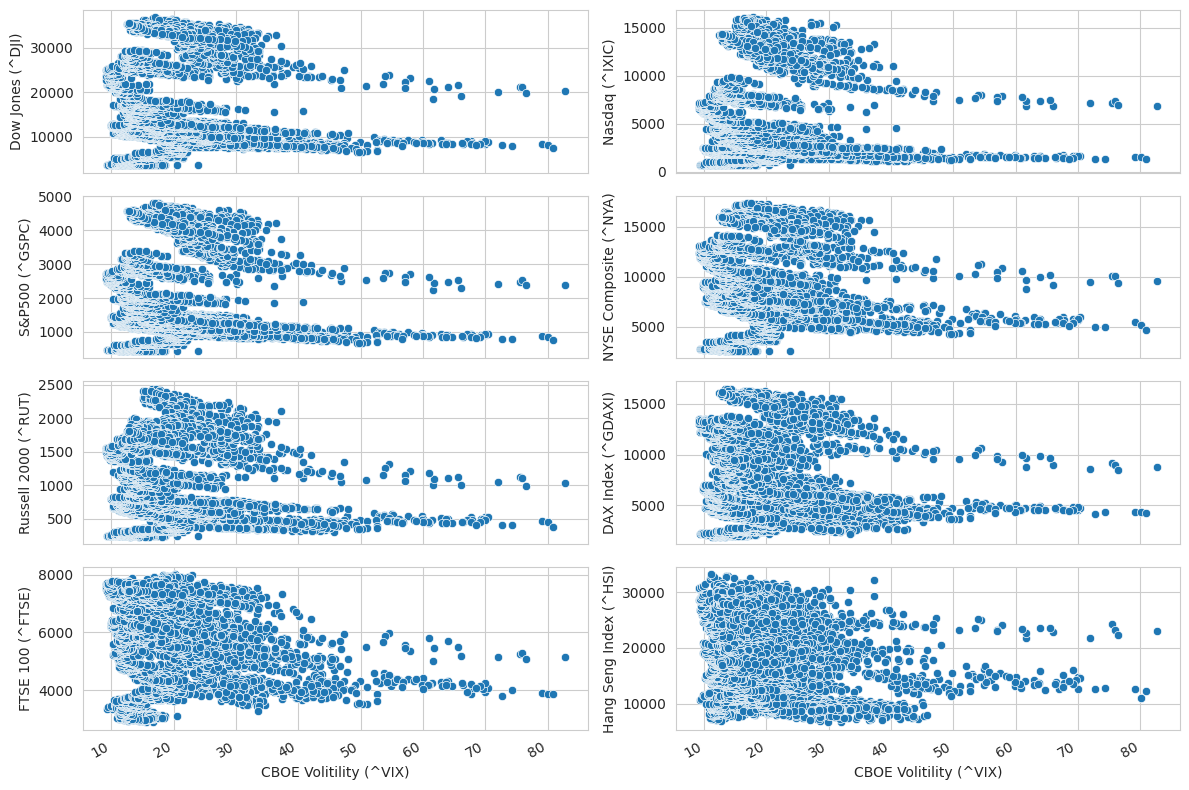

In [ ]:
"""
---------------------------------------------------
CORRELACION CBOE VOLITILITY COMPOSITE CON OTROS INDICADORES
---------------------------------------------------
"""
sns.set_style('whitegrid')
fig, axes = plt.subplots(4,2,figsize=(12,8))
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,5],y=df_mrki_1.iloc [:,0], ax=axes[0,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,5],y=df_mrki_1.iloc [:,1], ax=axes[0,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,5],y=df_mrki_1.iloc [:,2], ax=axes[1,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,5],y=df_mrki_1.iloc [:,3], ax=axes[1,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,5],y=df_mrki_1.iloc [:,4], ax=axes[2,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,5],y=df_mrki_1.iloc [:,6], ax=axes[2,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,5],y=df_mrki_1.iloc [:,7], ax=axes[3,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,5],y=df_mrki_1.iloc [:,8], ax=axes[3,1])
plt.gcf().autofmt_xdate() # Ajuste valores de fechas
plt.tight_layout() # Ajustar los ejes
plt.show()

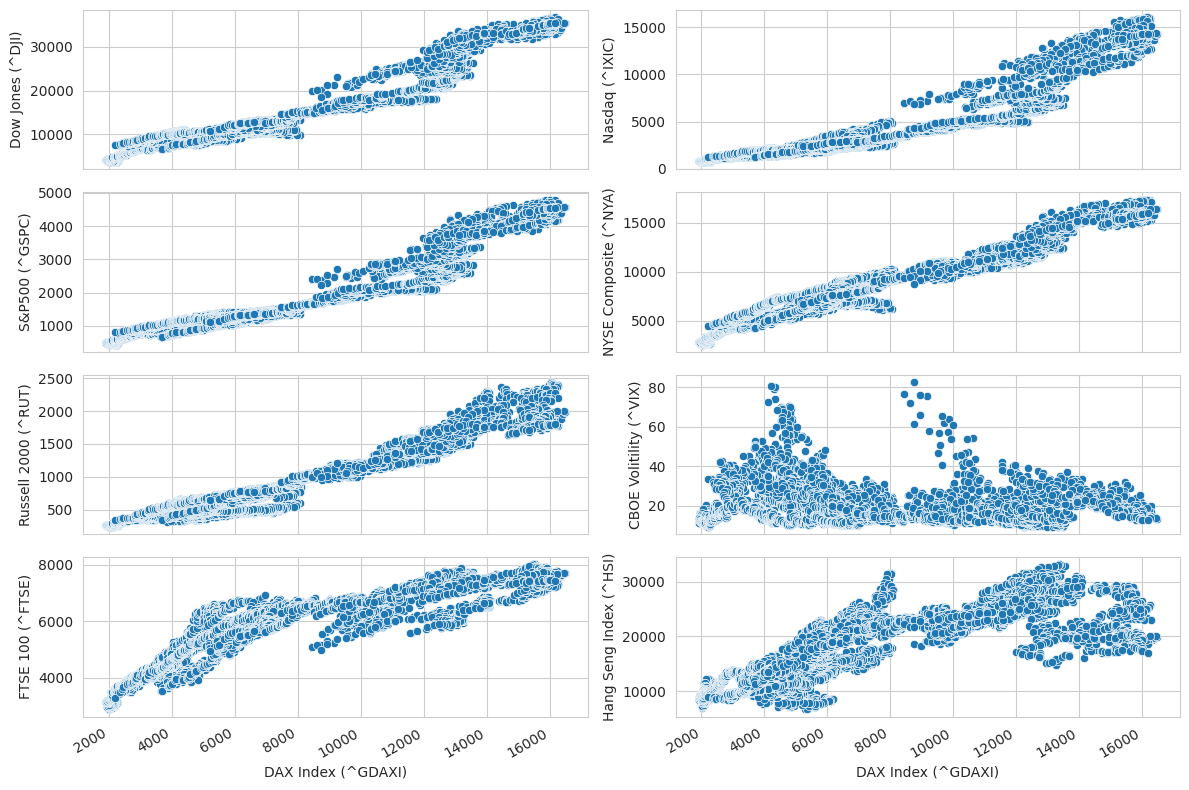

In [ ]:
"""
---------------------------------------------------
CORRELACION DAX CON OTROS INDICADORES
---------------------------------------------------
"""
sns.set_style('whitegrid')
fig, axes = plt.subplots(4,2,figsize=(12,8))
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,6],y=df_mrki_1.iloc [:,0], ax=axes[0,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,6],y=df_mrki_1.iloc [:,1], ax=axes[0,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,6],y=df_mrki_1.iloc [:,2], ax=axes[1,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,6],y=df_mrki_1.iloc [:,3], ax=axes[1,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,6],y=df_mrki_1.iloc [:,4], ax=axes[2,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,6],y=df_mrki_1.iloc [:,5], ax=axes[2,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,6],y=df_mrki_1.iloc [:,7], ax=axes[3,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,6],y=df_mrki_1.iloc [:,8], ax=axes[3,1])
plt.gcf().autofmt_xdate() # Ajuste valores de fechas
plt.tight_layout() # Ajustar los ejes
plt.show()

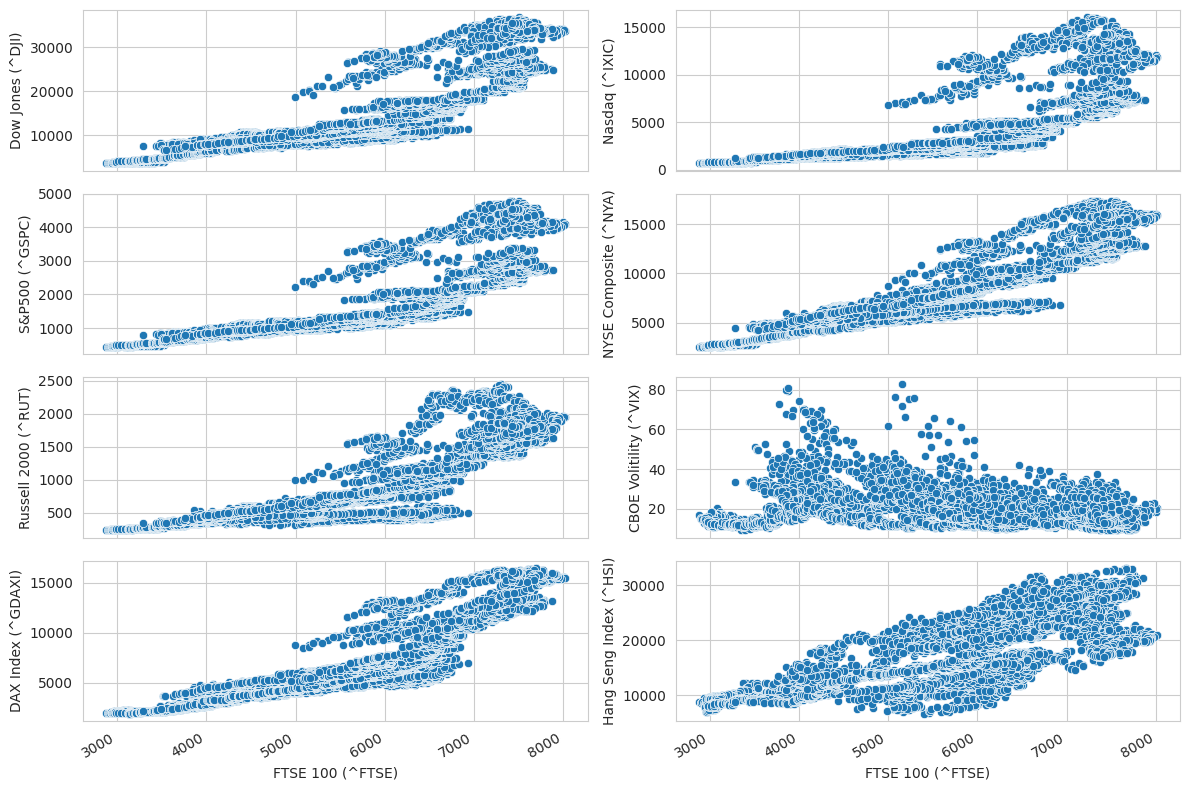

In [ ]:
"""
---------------------------------------------------
CORRELACION FTSE100 COMPOSITE CON OTROS INDICADORES
---------------------------------------------------
"""
sns.set_style('whitegrid')
fig, axes = plt.subplots(4,2,figsize=(12,8))
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,7],y=df_mrki_1.iloc [:,0], ax=axes[0,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,7],y=df_mrki_1.iloc [:,1], ax=axes[0,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,7],y=df_mrki_1.iloc [:,2], ax=axes[1,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,7],y=df_mrki_1.iloc [:,3], ax=axes[1,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,7],y=df_mrki_1.iloc [:,4], ax=axes[2,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,7],y=df_mrki_1.iloc [:,5], ax=axes[2,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,7],y=df_mrki_1.iloc [:,6], ax=axes[3,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,7],y=df_mrki_1.iloc [:,8], ax=axes[3,1])
plt.gcf().autofmt_xdate() # Ajuste valores de fechas
plt.tight_layout() # Ajustar los ejes
plt.show()

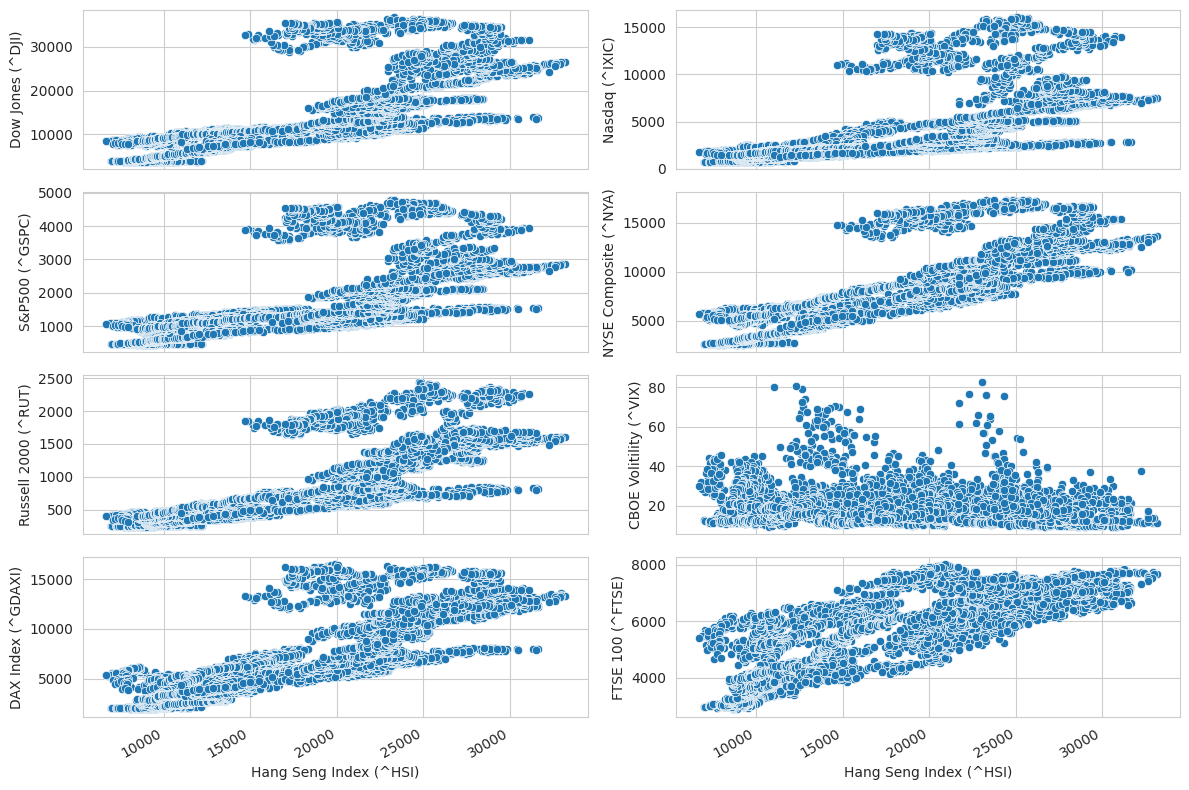

In [ ]:
"""
---------------------------------------------------
CORRELACION HANG SENG INDEX COMPOSITE CON OTROS INDICADORES
---------------------------------------------------
"""
sns.set_style('whitegrid')
fig, axes = plt.subplots(4,2,figsize=(12,8))
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,8],y=df_mrki_1.iloc [:,0], ax=axes[0,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,8],y=df_mrki_1.iloc [:,1], ax=axes[0,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,8],y=df_mrki_1.iloc [:,2], ax=axes[1,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,8],y=df_mrki_1.iloc [:,3], ax=axes[1,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,8],y=df_mrki_1.iloc [:,4], ax=axes[2,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,8],y=df_mrki_1.iloc [:,5], ax=axes[2,1])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,8],y=df_mrki_1.iloc [:,6], ax=axes[3,0])
sns.scatterplot(data=df_mrki_1, x=df_mrki_1.iloc [:,8],y=df_mrki_1.iloc [:,7], ax=axes[3,1])
plt.gcf().autofmt_xdate() # Ajuste valores de fechas
plt.tight_layout() # Ajustar los ejes
plt.show()

En este apartado podemos ver que existe una fuerte correlacion entre los principales indices del mercado estado unidense los cuales son: DOW JONES,NASDAQ,S&P500 Y NYSE COMPOSITE, esto implica que cualquier cambio en uno de ellos ya sea creciente o decreciente impactara en el mismo sentido en los otros. En menor medida se observa una correlacion entre los primeros y los indices RUSSEL2000 Y DAX. NO SE OBSERVA CORRELACION ALGUNA ENTRE ESTOS Y EL INDICE HANG SENG, CBOE Y FTSE100.

GRAFICAS PRELIMINARES COMMODITIES DE AGRICULTURA

In [ ]:
# Los Valores en cero no son representativos ya que estos indices a nivel historico tienen un valor
# Aquellas celdas que sean = 0 las eliminamos del data set
df_agci_1 = df_agci[df_agci != 0]
df_agci_1.index = df_agci_1['Date']
df_agci_1 = df_agci_1.drop(columns=['Date'])
df_agci_1 = df_agci_1.drop(columns=['Año'])
df_agci_1 = df_agci_1.drop(columns=['Mes'])
df_agci_1 = df_agci_1.drop(columns=['Dia'])


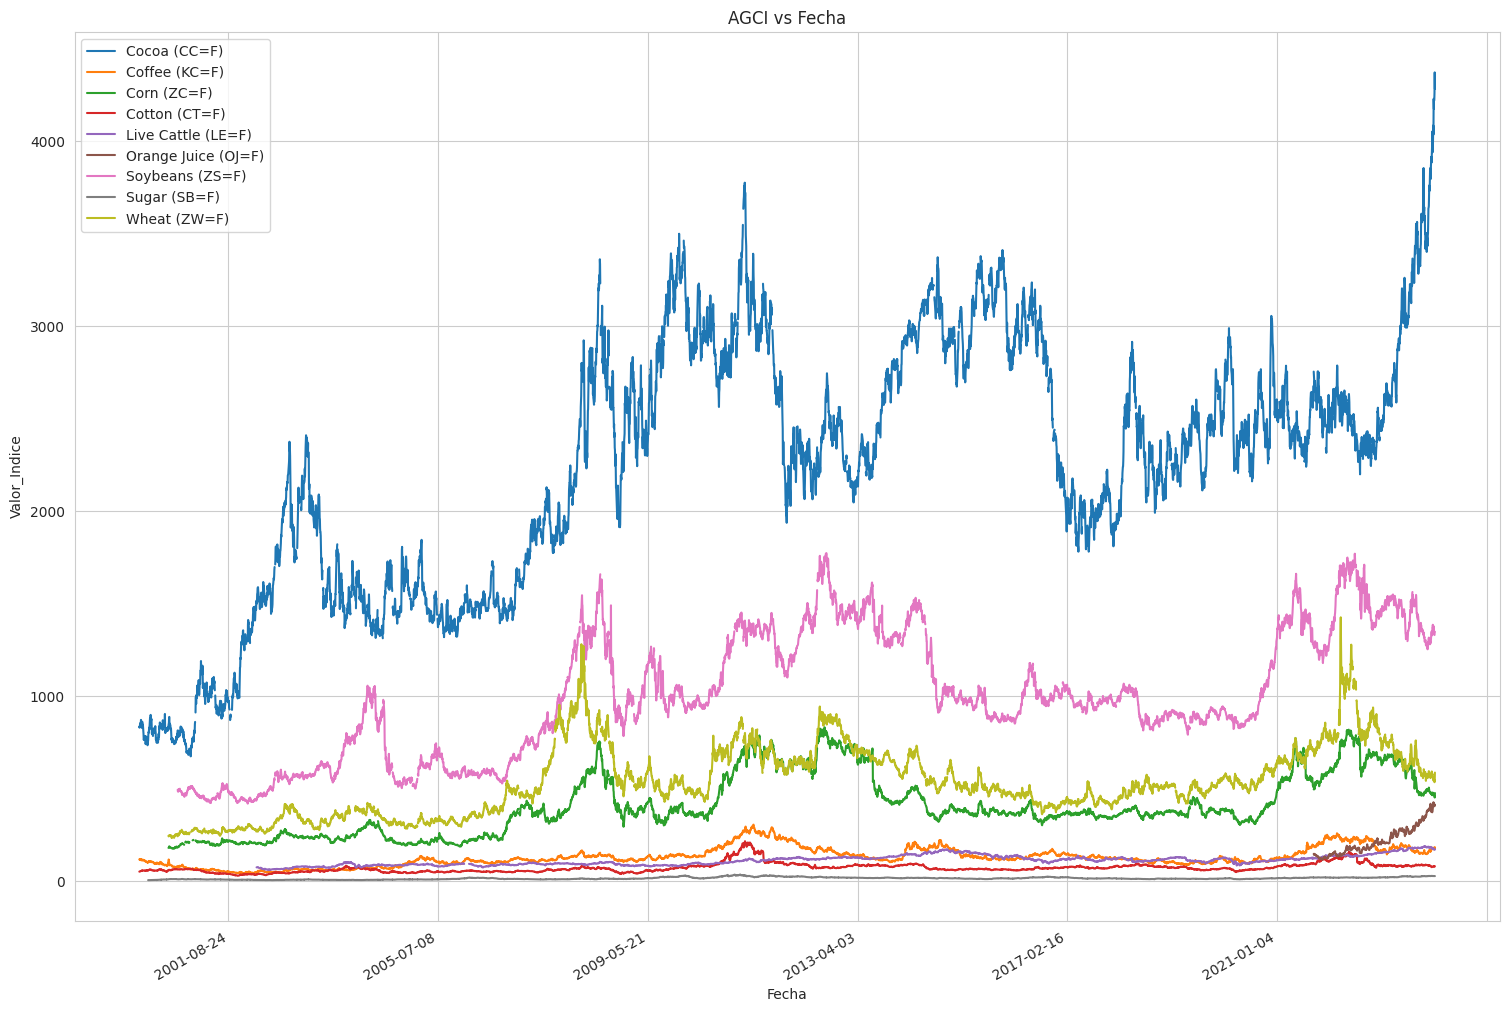

In [ ]:
# GRAFICO AGCI
fig, ax = plt.subplots(figsize=(15,10))
df_agci_1.plot(ax = ax)
plt.gcf().autofmt_xdate() # Ajuste valores de fechas
plt.tight_layout() # Ajustar los ejes
ax.set_title('AGCI vs Fecha')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor_Indice')
plt.show()

GRAFICO PRELIMINAR COMMODITIES DE ENERGIA

In [ ]:
# Los Valores en cero no son representativos ya que estos indices a nivel historico tienen un valor
# Aquellas celdas que sean = 0 las eliminamos del data set
df_enci_1 = df_enci[df_enci != 0]
df_enci_1.index = df_enci_1['Date']
df_enci_1 = df_enci_1.drop(columns=['Date'])
df_enci_1 = df_enci_1.drop(columns=['Año'])
df_enci_1 = df_enci_1.drop(columns=['Mes'])
df_enci_1 = df_enci_1.drop(columns=['Dia'])

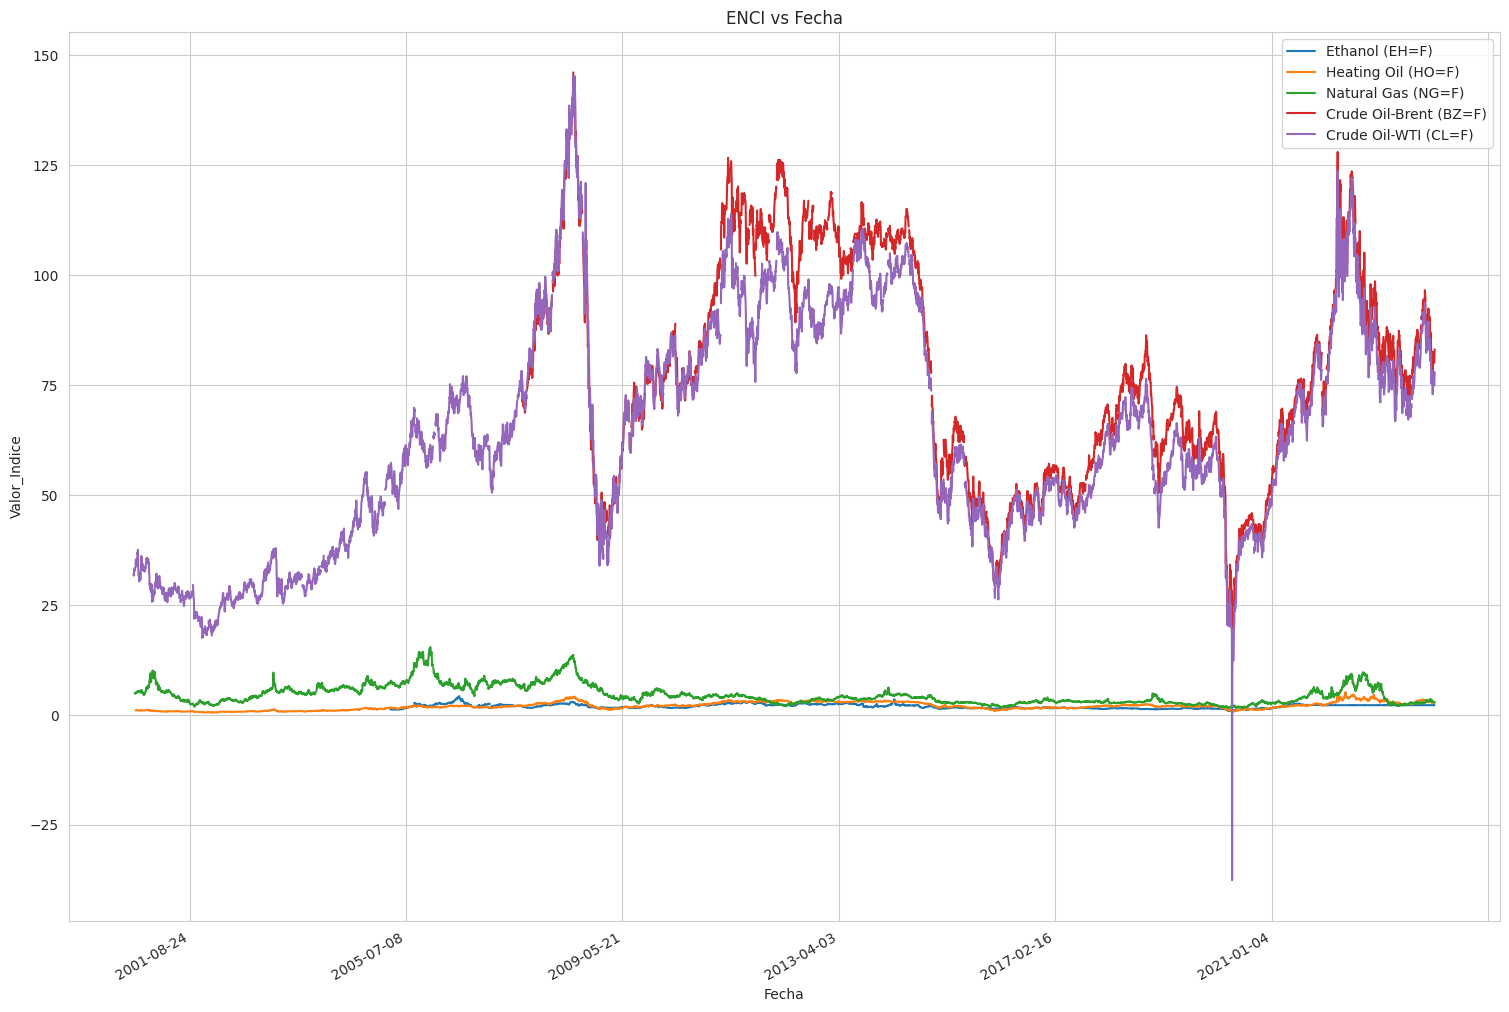

In [ ]:
# GRAFICO ENCI
fig, ax = plt.subplots(figsize=(15,10))
df_enci_1.plot(ax = ax)
plt.gcf().autofmt_xdate() # Ajuste valores de fechas
plt.tight_layout() # Ajustar los ejes
ax.set_title('ENCI vs Fecha')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor_Indice')
plt.show()

GRAFICO PRELIMINAR COMMODITIES DE METAL

In [ ]:
# Los Valores en cero no son representativos ya que estos indices a nivel historico tienen un valor
# Aquellas celdas que sean = 0 las eliminamos del data set
df_mtci_1 = df_mtci[df_mtci != 0]
df_mtci_1.index = df_mtci_1['Date']
df_mtci_1 = df_mtci_1.drop(columns=['Date'])
df_mtci_1 = df_mtci_1.drop(columns=['Año'])
df_mtci_1 = df_mtci_1.drop(columns=['Mes'])
df_mtci_1 = df_mtci_1.drop(columns=['Dia'])

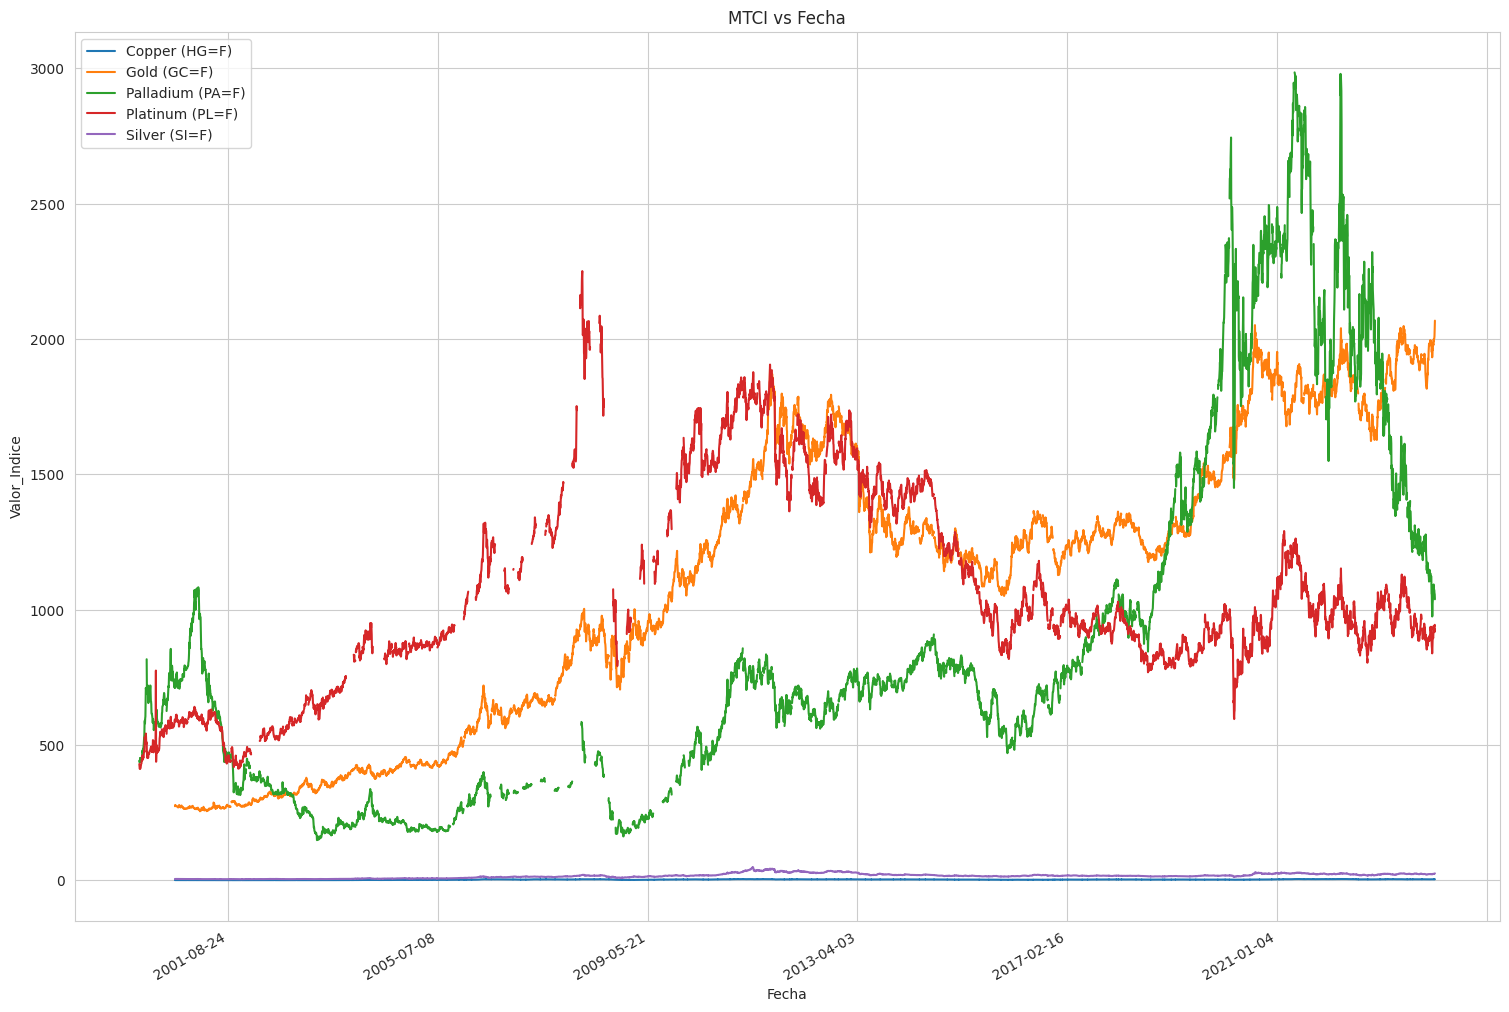

In [ ]:
# GRAFICO ENCI
fig, ax = plt.subplots(figsize=(15,10))
df_mtci_1.plot(ax = ax)
plt.gcf().autofmt_xdate() # Ajuste valores de fechas
plt.tight_layout() # Ajustar los ejes
ax.set_title('MTCI vs Fecha')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor_Indice')
plt.show()

GRAFICO PRELIMINAR BONOS

In [ ]:
# Los Valores en cero no son representativos ya que estos indices a nivel historico tienen un valor
# Aquellas celdas que sean = 0 las eliminamos del data set
df_bns_1 = df_bns[df_bns != 0]
df_bns_1.index = df_bns_1['Date']
df_bns_1 = df_bns_1.drop(columns=['Date'])
df_bns_1 = df_bns_1.drop(columns=['Año'])
df_bns_1 = df_bns_1.drop(columns=['Mes'])
df_bns_1 = df_bns_1.drop(columns=['Dia'])

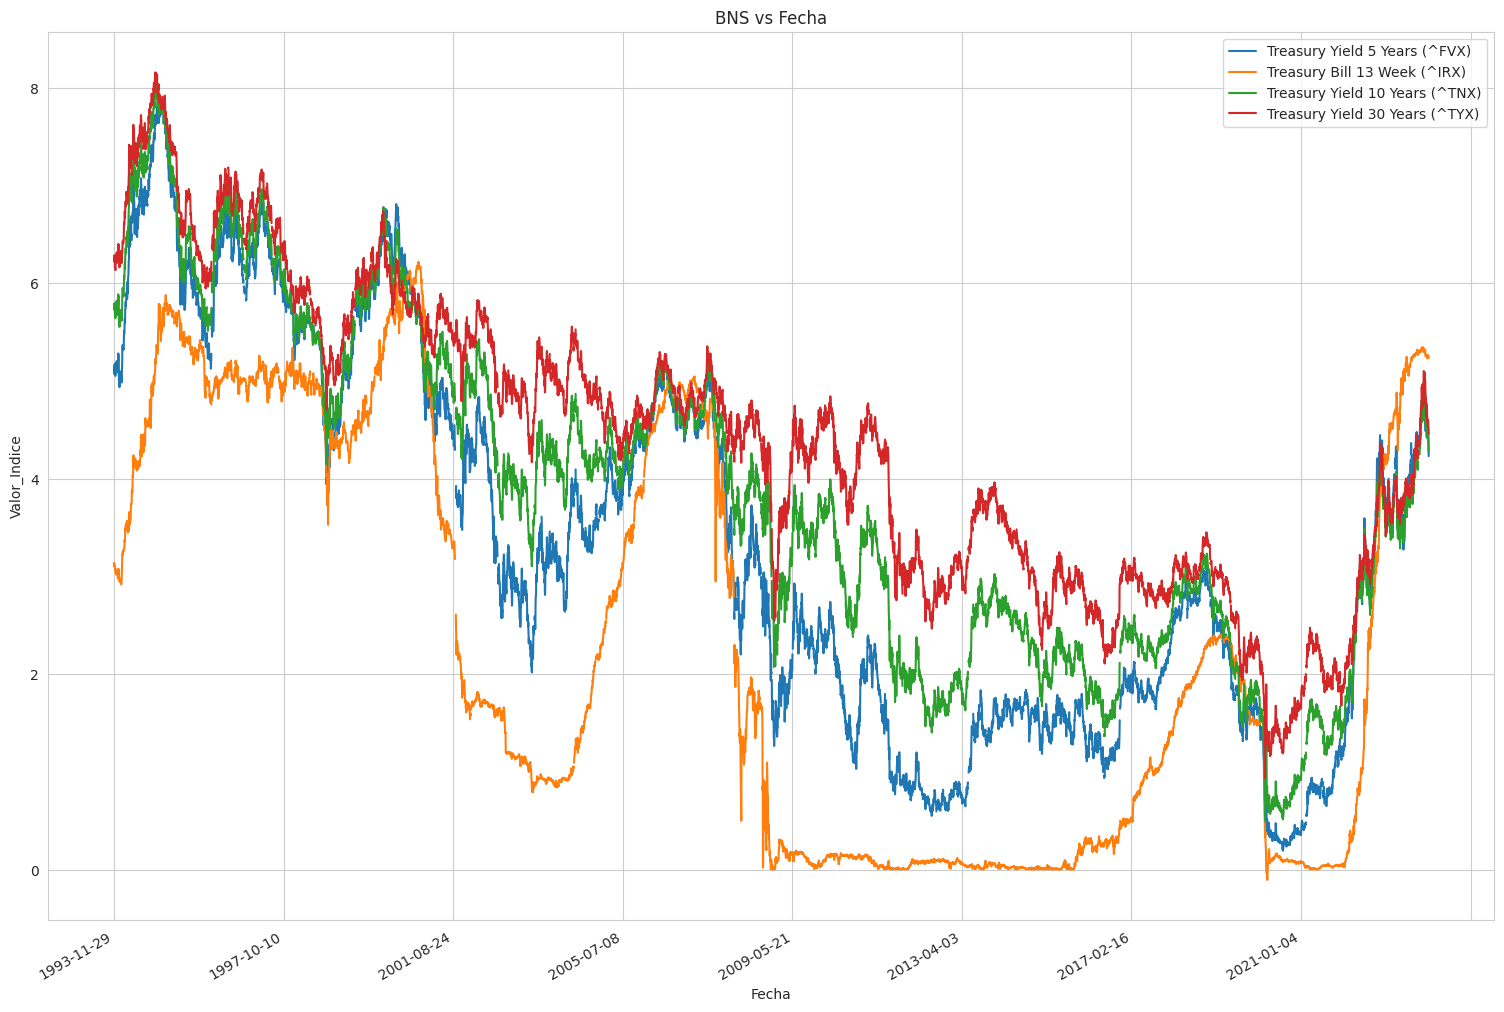

In [ ]:
# GRAFICO ENCI
fig, ax = plt.subplots(figsize=(15,10))
df_bns_1.plot(ax = ax)
plt.gcf().autofmt_xdate() # Ajuste valores de fechas
plt.tight_layout() # Ajustar los ejes
ax.set_title('BNS vs Fecha')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor_Indice')
plt.show()